<a href="https://colab.research.google.com/github/haritmm97/ML-Projects-Portfolio/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement:** A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value.For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhoodand based on gathered data you will try to assess your house price.

**Objective:**
Take advantage of all of the feature variables available below,use it to analyse and predict house prices.
1.cid: a notation for a house
2.dayhours: Date house was sold
3.price: Price is prediction target
4.room_bed: Number of Bedrooms/House
5.room_bath: Number of bathrooms/bedrooms
6.living_measure: square footage of the home
7.lot_measure: quare footage of the lot
8.ceil: Total floors (levels) in house
9.coast: House which has a view to a waterfront
10.sight: Has been viewed
11.condition: How goodthe condition is (Overall)
12.quality: grade given to the housing unit, based on grading system
13.ceil_measure: square footage of house apart from basement
14.basement_measure: square footage of the basement
15.yr_built: Built Year
16.yr_renovated: Year when house was renovated
17.zipcode: zip
18.lat: Latitude coordinate
19.long: Longitude coordinate
20.living_measure15: Living room area in 2015(implies--some renovations) This might or might not have affected the lotsize area
21.lot_measure15: lotSizearea in 2015(implies--some renovations)
22.furnished: Based on the quality of room 
23: total_area: Measure of both living and lot


In [695]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing Libraries

In [0]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

## 2. Loading Dataset

In [0]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Machine Learning/Great Learning/Capstone/innercity.csv")

In [698]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [699]:
df.tail()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
21608,5137800030,20140701T000000,300000,4,2.50,2303,3826,2.0,0,0,3,8,2303,0,2006,0,98092,47.3258,-122.165,2516,4500,0,6129
21609,8562890910,20140619T000000,320000,4,2.50,3490,5000,2.0,0,0,3,8,3490,0,2003,0,98042,47.3772,-122.127,2910,5025,0,8490
21610,1442880160,20140627T000000,483453,4,2.75,2790,5527,2.0,0,0,3,8,2790,0,2014,0,98045,47.4827,-121.773,2620,5509,0,8317
21611,622100130,20140917T000000,365000,2,2.00,1440,15000,1.0,0,0,3,7,1440,0,1985,0,98072,47.7648,-122.159,1780,15000,0,16440
21612,6413600276,20150324T000000,354950,3,1.00,970,5922,1.5,0,0,3,7,970,0,1949,0,98125,47.7190,-122.321,1730,6128,0,6892


In [700]:
df.shape

(21613, 23)

23 variables & 21613 data points

## 3. Exploratory Data Analysis

In [701]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
coast,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [702]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

Observed that all variables are integer/float values. Data points to be checked and converted to categorical, wherever necessary

#### 3.1 Analysis on price variable: the variable we're trying to predict

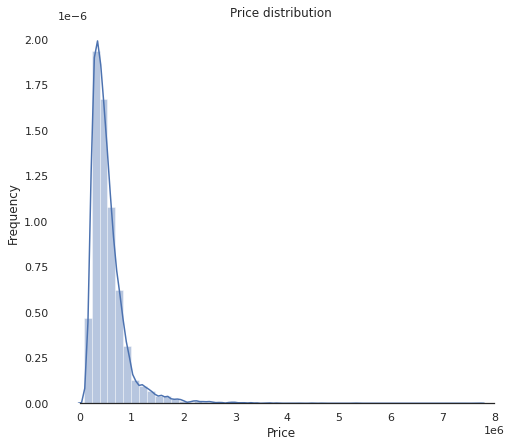

In [703]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Price")
ax.set(title="Price distribution")
sns.despine(trim=True, left=True)
plt.show()

In [704]:
# Skew and kurt
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


Skewness values is more than 1, indicates data is skewed.
Kurtosis value is very high.

This indicates the data is not normally distributed

In [705]:
print('Minimum price: ', df['price'].min())
print('Maximum price: ',df['price'].max())
print('Mean value: ', df['price'].mean())
print('Median value: ',df['price'].median())
print('Standard deviation: ', df['price'].std())
print('Range of values: ', df['price'].max()-df['price'].min())

Minimum price:  75000
Maximum price:  7700000
Mean value:  540182.1587933188
Median value:  450000.0
Standard deviation:  367362.2317180104
Range of values:  7625000


In [706]:
Q1=df['price'].quantile(q=0.25)
Q3=df['price'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['price']))

1st Quartile (Q1) is:  321950.0
3st Quartile (Q3) is:  645000.0
Interquartile range (IQR) is  323050.0


In [707]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers: ', L_outliers)
print('Upper outliers: ', U_outliers)

Lower outliers:  -162625.0
Upper outliers:  1129575.0


In [708]:
print('Number of outliers in price upper : ', df[df['price']>1129575.0]['price'].count())
print('Number of outliers in price lower : ', df[df['price']<-162625.0]['price'].count())
print('% of Outlier in price upper: ',round(df[df['price']>1129575.0]['price'].count()*100/len(df)), '%')
print('% of Outlier in price lower: ',round(df[df['price']<-162625.0]['price'].count()*100/len(df)), '%')

Number of outliers in price upper :  1159
Number of outliers in price lower :  0
% of Outlier in price upper:  5.0 %
% of Outlier in price lower:  0.0 %


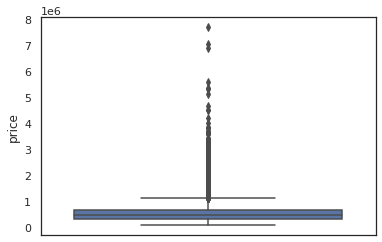

In [709]:
#boxplot of price variable
sns.boxplot(x='price',data=df,orient='v')

#### 3.2 Converting certain numeric variables to categorical 

In [710]:
df['cid'] = pd.Categorical(df.cid)
df['dayhours'] = pd.Categorical(df.dayhours)
df['ceil'] = pd.Categorical(df.ceil)
df['coast'] = pd.Categorical(df.coast)
df['sight'] = pd.Categorical(df.sight)
df['condition'] = pd.Categorical(df.condition)
df['quality'] = pd.Categorical(df.quality)
df['furnished'] = pd.Categorical(df.furnished)
df['yr_renovated'] = pd.Categorical(df.yr_renovated)
df['zipcode'] = pd.Categorical(df.zipcode)
df['lat'] = pd.Categorical(df.lat)
df['long'] = pd.Categorical(df.long)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null category
dayhours            21613 non-null category
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null category
coast               21613 non-null category
sight               21613 non-null category
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null category
zipcode             21613 non-null category
lat                 21613 non-null category
long                21613 non-null category
living_measure15    21613 non-null int64
lot_measure15       21613 non-null i

#### 3.3 Analysing individual variables

###### 3.3.1 dayhours

In [711]:
df['dayhours'].value_counts()

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140830T000000      1
20141130T000000      1
20150524T000000      1
20141102T000000      1
20150527T000000      1
Name: dayhours, Length: 372, dtype: int64

In [712]:
# From dayhours, extracting year & month
df['dayhours_yr'] = df.dayhours.apply(lambda x: x[:4])
df['dayhours_mon_1'] = df.dayhours.apply(lambda x: x[:6])
df['dayhours_mon'] = df.dayhours_mon_1.apply(lambda x: x[-2:])
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,dayhours_yr,dayhours_mon_1,dayhours_mon
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,2014,201411,11
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2014,201412,12
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2015,201504,04
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,2014,201405,05
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,2015,201504,04


In [713]:
df['dayhours_yr'].value_counts()

2014    14633
2015     6980
Name: dayhours_yr, dtype: int64

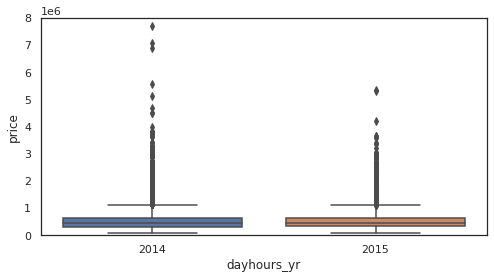

In [714]:
data = pd.concat([df['price'], df['dayhours_yr']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=df['dayhours_yr'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed no much difference in price value for 2014 & 2015

In [715]:
df['dayhours_mon'].value_counts()

05    2414
04    2231
07    2211
06    2180
08    1940
10    1878
03    1875
09    1774
12    1471
11    1411
02    1250
01     978
Name: dayhours_mon, dtype: int64

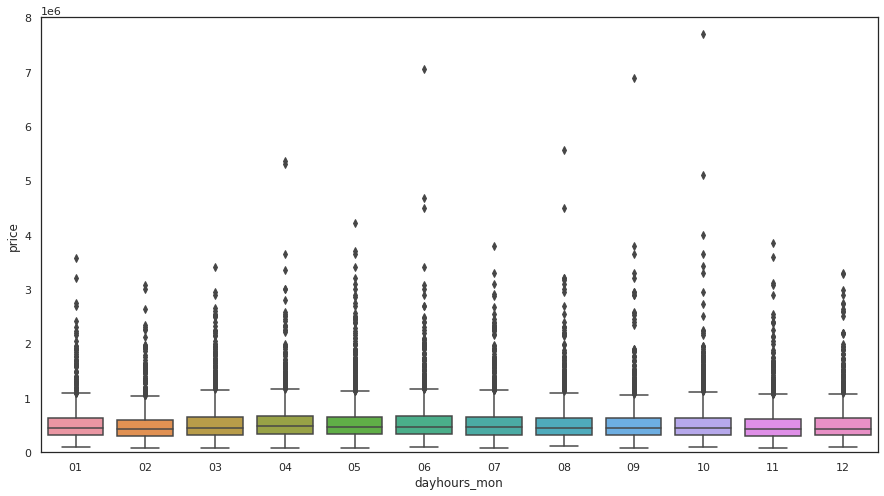

In [716]:
data = pd.concat([df['price'], df['dayhours_mon']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['dayhours_mon'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed no much difference in price value across the months

###### 3.3.2 room_bed 

In [717]:
df['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

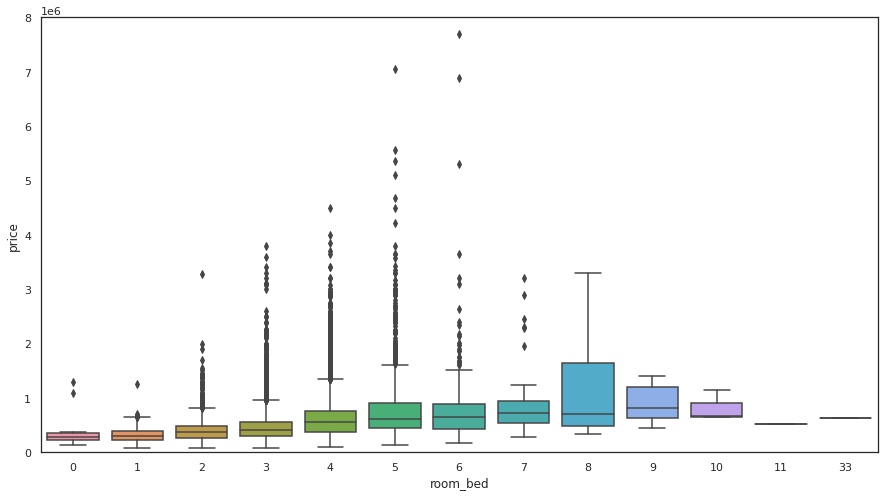

In [718]:
data = pd.concat([df['price'], df['room_bed']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['room_bed'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed, price is increasing with no of bed-rooms

###### 3.3.2 room_bath

In [719]:
df['room_bath'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

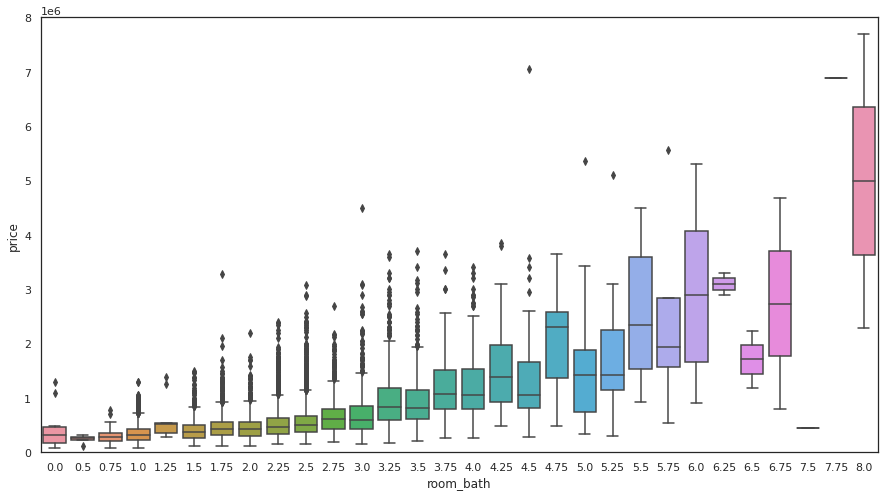

In [720]:
data = pd.concat([df['price'], df['room_bath']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['room_bath'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed, price is increasing with room_bath

###### 3.3.4 coast

In [721]:
df['coast'].value_counts()

0    21450
1      163
Name: coast, dtype: int64

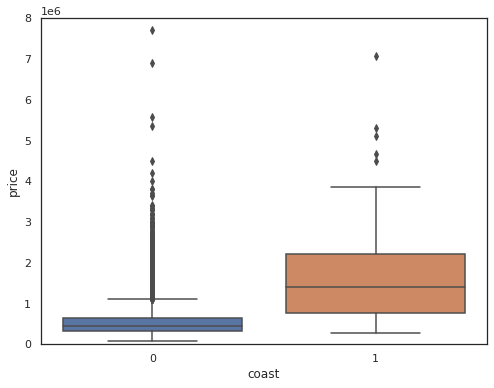

In [722]:
data = pd.concat([df['price'], df['coast']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=df['coast'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed, price is high for houses near coast

###### 3.3.5 sight

In [723]:
df['sight'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

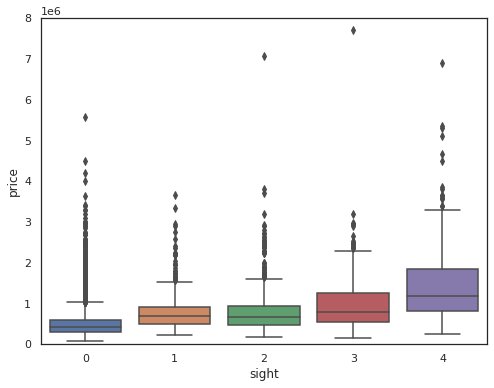

In [724]:
data = pd.concat([df['price'], df['sight']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=df['sight'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed, price is increasing with sight

###### 3.3.6 quality

In [725]:
df['quality'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

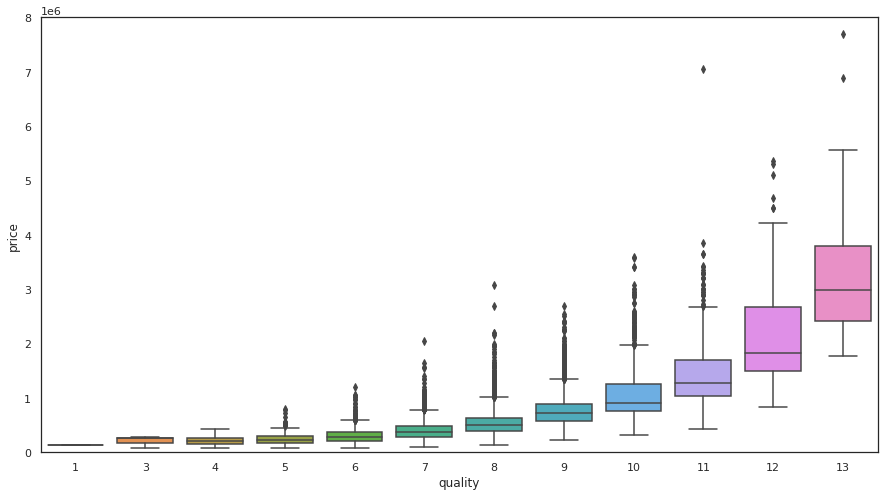

In [726]:
data = pd.concat([df['price'], df['quality']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['quality'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed price increasing with quality

###### 3.3.7 condition

In [727]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

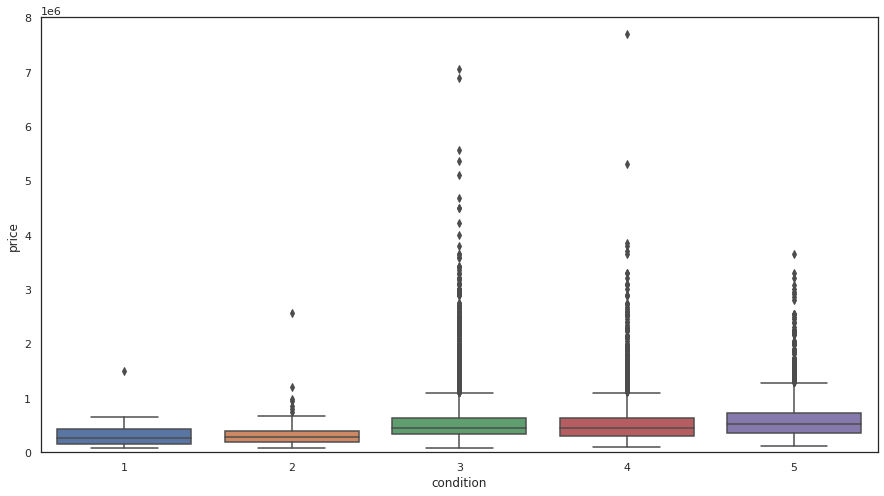

In [728]:
data = pd.concat([df['price'], df['condition']], axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df['condition'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed price is increasing with condition

###### 3.3.8 furnished

In [729]:
df['furnished'].value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

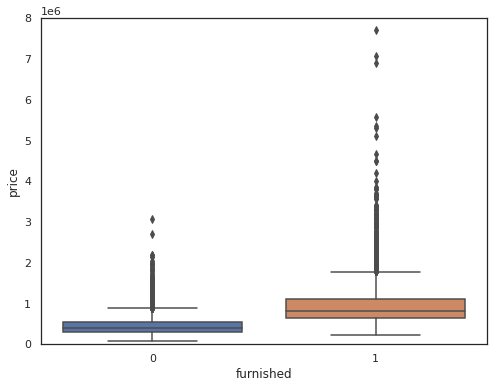

In [730]:
data = pd.concat([df['price'], df['furnished']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=df['furnished'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

Observed, furnished houses has high price

###### 3.3.9  yr_built

In [731]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

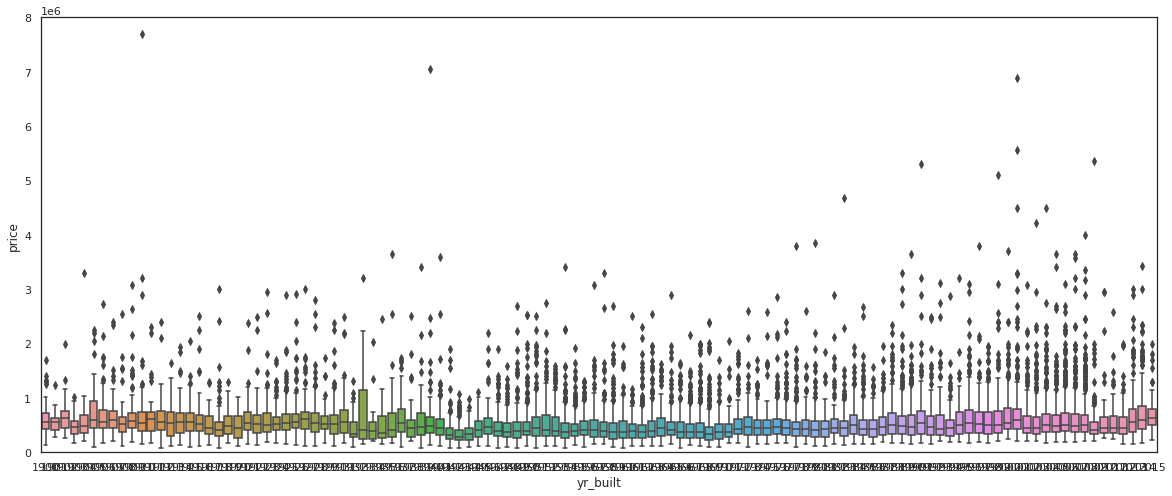

In [732]:
data = pd.concat([df['price'], df['yr_built']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=df['yr_built'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

###### 3.3.10 living_measure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


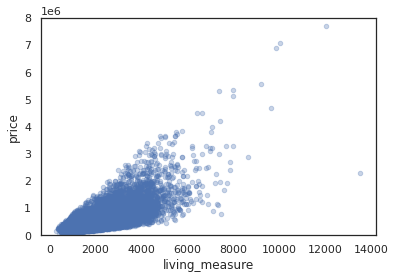

In [733]:
data = pd.concat([df['price'], df['living_measure']], axis=1)
data.plot.scatter(x='living_measure', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.11 lot_measure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


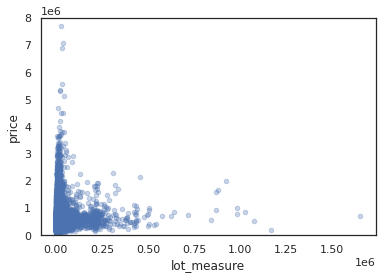

In [734]:
data = pd.concat([df['price'], df['lot_measure']], axis=1)
data.plot.scatter(x='lot_measure', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.12 ceil_measure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


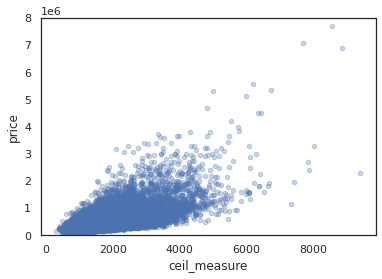

In [735]:
data = pd.concat([df['price'], df['ceil_measure']], axis=1)
data.plot.scatter(x='ceil_measure', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.13 basement

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


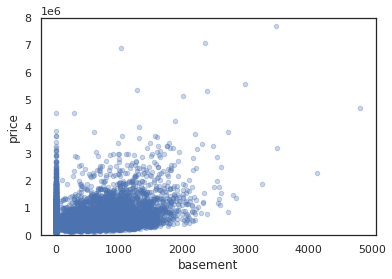

In [736]:
data = pd.concat([df['price'], df['basement']], axis=1)
data.plot.scatter(x='basement', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.14 living_measure15

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


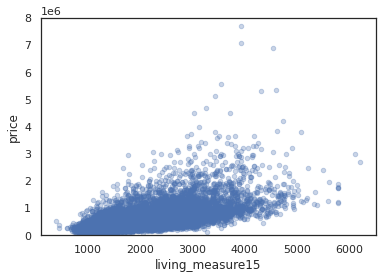

In [737]:
data = pd.concat([df['price'], df['living_measure15']], axis=1)
data.plot.scatter(x='living_measure15', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.15 lot_measure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


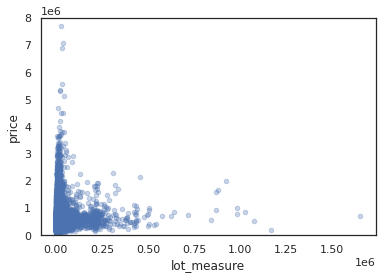

In [738]:
data = pd.concat([df['price'], df['lot_measure']], axis=1)
data.plot.scatter(x='lot_measure', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.13 total_area

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


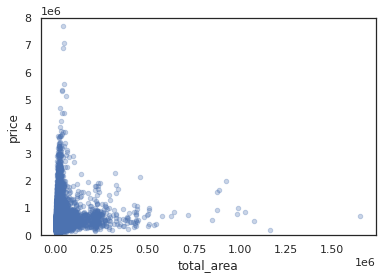

In [739]:
data = pd.concat([df['price'], df['total_area']], axis=1)
data.plot.scatter(x='total_area', y='price', alpha=0.3, ylim=(0,8000000));

###### 3.3.14 ceil

In [740]:
df['ceil'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64

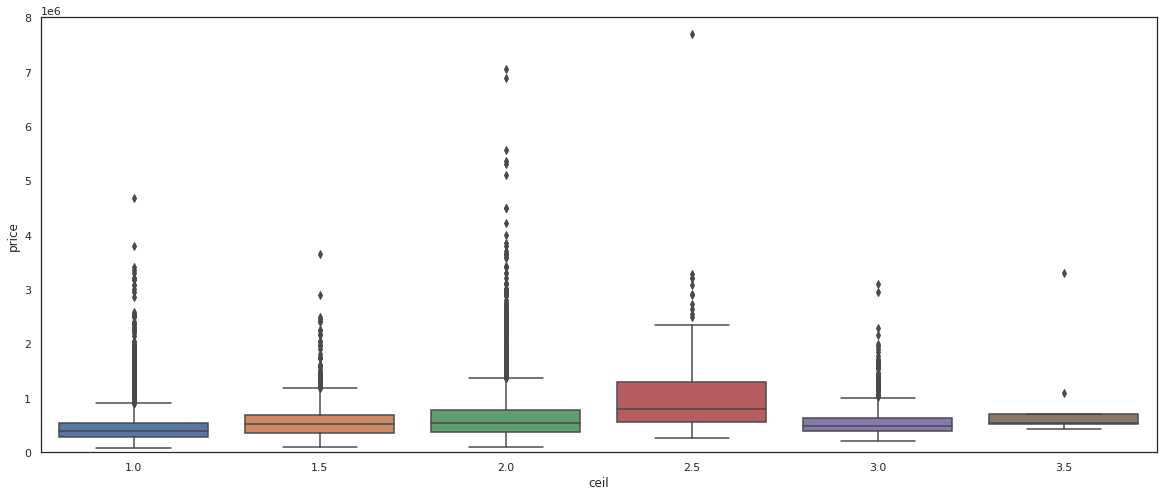

In [741]:
data = pd.concat([df['price'], df['ceil']], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=df['ceil'], y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

#### 3.4 Analysis on Zipcodes

In [742]:
df_location = df[['zipcode','lat', 'long', 'total_area', 'price']]
df_location.head(10)

,zipcode,lat,long,total_area,price
0,98133,47.7174,-122.336,16477,808100
1,98023,47.3165,-122.386,10050,277500
2,98038,47.3515,-121.999,6694,404000
3,98133,47.7049,-122.349,4664,300000
4,98115,47.6768,-122.269,5450,699000
5,98059,47.5279,-122.161,13740,585000
6,98133,47.7311,-122.353,7840,465000
7,98028,47.7592,-122.230,69369,480000
8,98119,47.6370,-122.371,7400,780000
9,98003,47.3437,-122.316,8530,215000


In [743]:
df_location['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [744]:
df_location['zipcode'].unique()

[98133, 98023, 98038, 98115, 98059, ..., 98070, 98108, 98109, 98102, 98024]
Length: 70
Categories (70, int64): [98133, 98023, 98038, 98115, ..., 98108, 98109, 98102, 98024]

### 3.5 Feature Engineering on Numerical features

In [745]:
# Split features and labels
df_labels = df['price'].reset_index(drop=True)
df_features = df.drop(['price'], axis=1)

df_features.shape

(21613, 25)

In [0]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_features.columns:
    if df_features[i].dtype in numeric_dtypes:
        numeric.append(i)

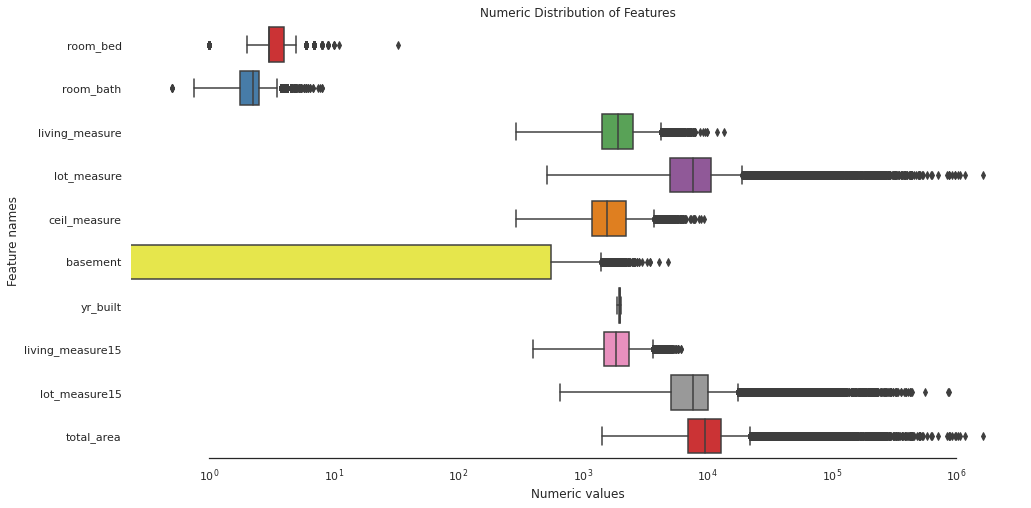

In [747]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xscale("log")
ax = sns.boxplot(data=df_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [748]:
# Find skewed numerical features
skew_features = df_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features.head(25)

lot_measure         13.059113
total_area          12.955168
lot_measure15        9.506083
room_bed             1.974163
basement             1.577856
living_measure       1.471453
ceil_measure         1.446564
living_measure15     1.108104
room_bath            0.511072
yr_built            -0.469773
dtype: float64

###### 3.5.1 Applying log transformation to certain numeric variables

###### 3.5.1.1 log transformation on price


 mu = 13.05 and sigma = 0.53



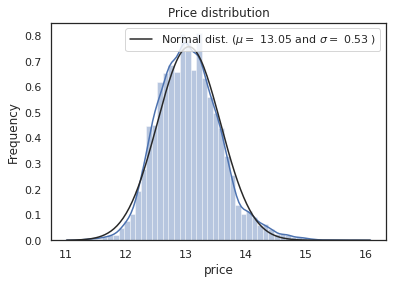

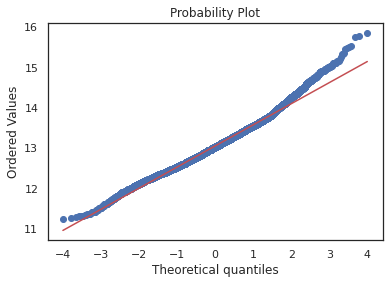

In [749]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["price"] = np.log1p(df["price"])

#Check the new distribution 
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

###### 3.5.1.2 log transformation on living_measure


 mu = 7.55 and sigma = 0.42



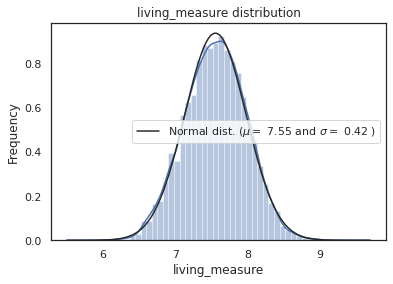

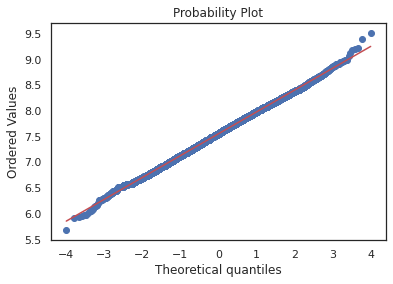

In [750]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["living_measure"] = np.log1p(df["living_measure"])

#Check the new distribution 
sns.distplot(df['living_measure'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['living_measure'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('living_measure distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['living_measure'], plot=plt)
plt.show()

###### 3.5.1.3 log transformation on lot_measure


 mu = 8.99 and sigma = 0.90



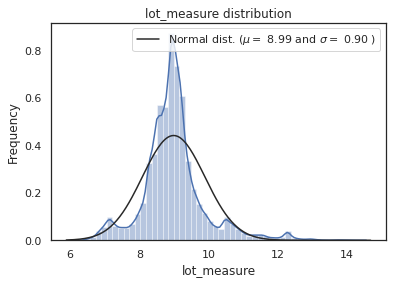

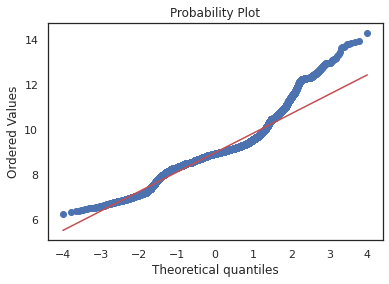

In [751]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["lot_measure"] = np.log1p(df["lot_measure"])

#Check the new distribution 
sns.distplot(df['lot_measure'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['lot_measure'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('lot_measure distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['lot_measure'], plot=plt)
plt.show()

###### 3.5.1.4 log transformation on ceil_measure


 mu = 7.40 and sigma = 0.43



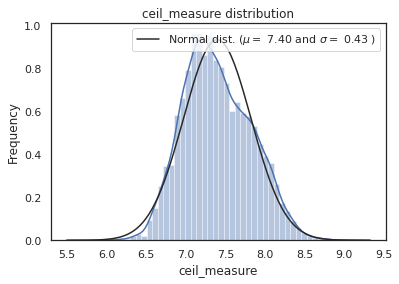

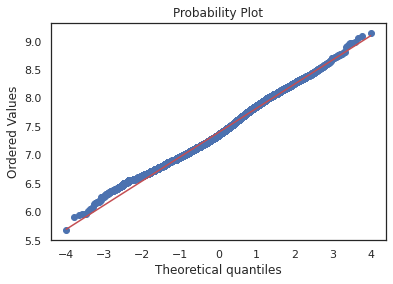

In [752]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["ceil_measure"] = np.log1p(df["ceil_measure"])

#Check the new distribution 
sns.distplot(df['ceil_measure'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['ceil_measure'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ceil_measure distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['ceil_measure'], plot=plt)
plt.show()

###### 3.5.1.5 log transformation on living_measure15


 mu = 7.54 and sigma = 0.33



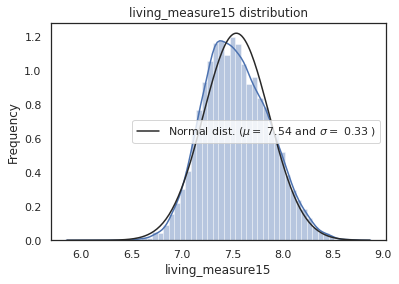

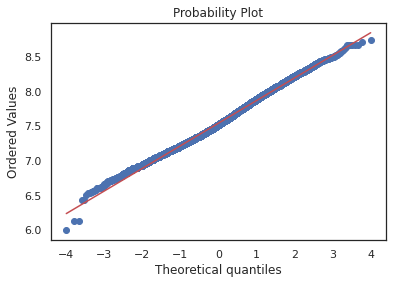

In [753]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["living_measure15"] = np.log1p(df["living_measure15"])

#Check the new distribution 
sns.distplot(df['living_measure15'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['living_measure15'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('living_measure15 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['living_measure15'], plot=plt)
plt.show()

###### 3.5.1.6 log transformation on lot_measure


 mu = 8.96 and sigma = 0.81



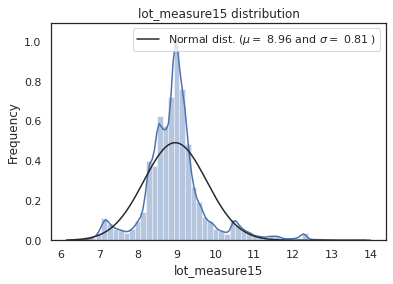

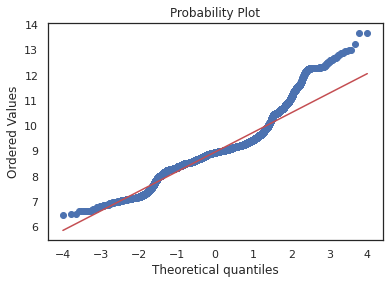

In [754]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["lot_measure15"] = np.log1p(df["lot_measure15"])

#Check the new distribution 
sns.distplot(df['lot_measure15'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['lot_measure15'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('lot_measure15 distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['lot_measure15'], plot=plt)
plt.show()

###### 3.5.1.7 log transformation on total_area


 mu = 9.25 and sigma = 0.77



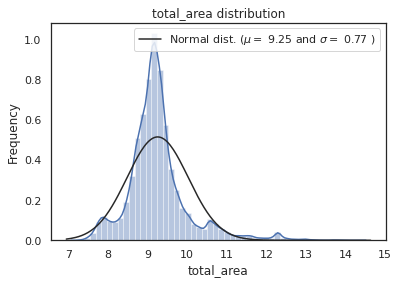

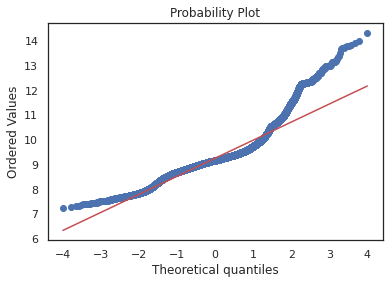

In [755]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["total_area"] = np.log1p(df["total_area"])

#Check the new distribution 
sns.distplot(df['total_area'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_area'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total_area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_area'], plot=plt)
plt.show()

###### 3.5.1.8 log transformation on basement


 mu = 2.53 and sigma = 3.17



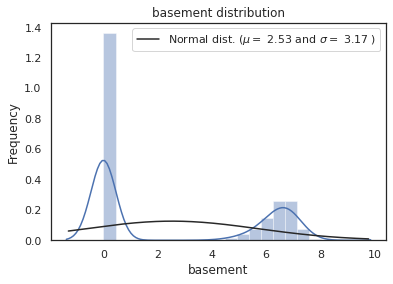

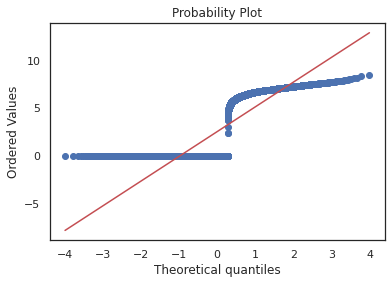

In [756]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["basement"] = np.log1p(df["basement"])

#Check the new distribution 
sns.distplot(df['basement'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['basement'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('basement distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['basement'], plot=plt)
plt.show()

######  3.5.2 checking for scaled numeric features

In [757]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,dayhours_yr,dayhours_mon_1,dayhours_mon
0,3034200666,20141107T000000,13.602442,4,3.25,8.013343,9.507329,1.0,0,0,5,9,8.013343,0.000000,1956,0,98133,47.7174,-122.336,7.659643,8.929833,1,9.709781,2014,201411,11
1,8731981640,20141204T000000,12.533580,4,2.50,7.844241,8.922792,1.0,0,0,3,8,7.467942,6.685861,1976,0,98023,47.3165,-122.386,7.723562,9.082621,0,9.215427,2014,201412,12
2,5104530220,20150420T000000,12.909173,3,2.50,7.771067,8.372167,2.0,0,0,3,8,7.771067,0.000000,2006,0,98038,47.3515,-121.999,7.771067,8.377701,0,8.809116,2015,201504,04
3,6145600285,20140529T000000,12.611541,2,1.00,6.710523,8.254529,1.0,0,0,4,6,6.710523,0.000000,1916,0,98133,47.7049,-122.349,7.327123,8.254529,0,8.447843,2014,201405,05
4,8924100111,20150424T000000,13.457407,2,1.50,7.244942,8.306719,1.0,0,0,4,8,7.244942,0.000000,1954,0,98115,47.6768,-122.269,7.550135,8.689633,0,8.603554,2015,201504,04


In [758]:
df.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil_measure,basement,yr_built,living_measure15,lot_measure15,total_area
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,13.047889,3.370842,2.114757,7.550910,8.990134,7.395548,2.529293,1971.005136,7.540000,8.961155,9.253717
std,0.526821,0.930062,0.770163,0.424561,0.902288,0.427361,3.170623,29.373411,0.327338,0.812926,0.773648
min,11.225257,0.000000,0.000000,5.673323,6.255750,5.673323,0.000000,1900.000000,5.991465,6.480045,7.261225
25%,12.682155,3.000000,1.750000,7.264030,8.525360,7.082549,0.000000,1951.000000,7.307202,8.537192,8.858795
50%,13.017005,3.000000,2.250000,7.555382,8.938400,7.353082,0.000000,1975.000000,7.518064,8.938663,9.167015
75%,13.377007,4.000000,2.500000,7.844241,9.276970,7.701200,6.329721,1997.000000,7.766841,9.218705,9.472782
max,15.856731,33.000000,8.000000,9.513477,14.317110,9.149634,8.480737,2015.000000,8.734077,13.677628,14.317897


In [759]:
# Split features and labels
df_labels = df['price'].reset_index(drop=True)
df_features = df.drop(['price'], axis=1)

df_features.shape

(21613, 25)

In [0]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_features.columns:
    if df_features[i].dtype in numeric_dtypes:
        numeric.append(i)

In [761]:
# Find skewed numerical features
skew_features = df_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features.head(25)

room_bed            1.974163
total_area          1.459475
lot_measure15       0.967188
lot_measure         0.962826
room_bath           0.511072
basement            0.484569
ceil_measure        0.254016
living_measure15    0.206950
living_measure     -0.034725
yr_built           -0.469773
dtype: float64

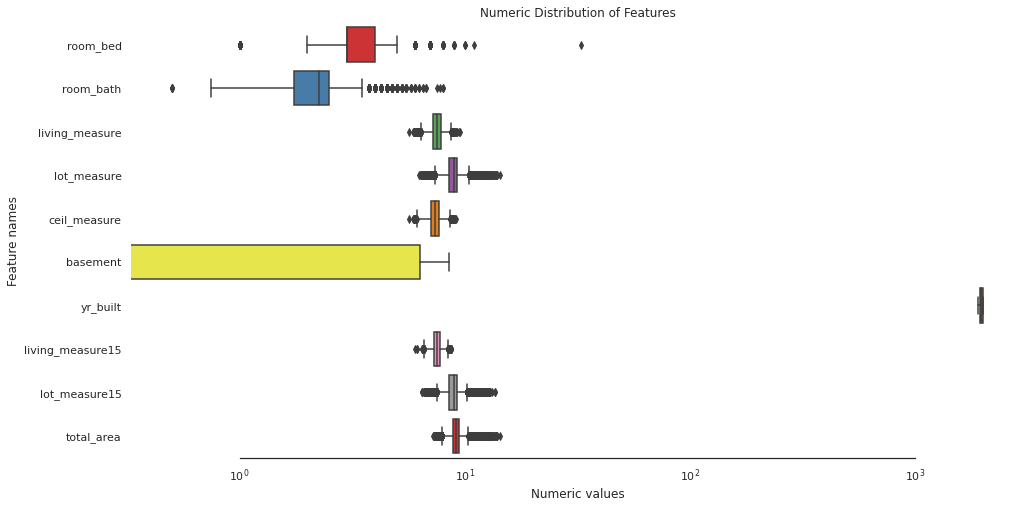

In [762]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xscale("log")
ax = sns.boxplot(data=df_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

Now all numeric features are scaled

###### 3.5.3 Removing unnecessary features



*   Dropping cid feature, as it is not adding any information
*   Dropping dayhours feature now. To be considered in future iterations
*   Dropping yr_renovated feature, as majority of data is missing (indicated by '0'). By checking the difference between living_measure15 & living_measure, observed decrease in area. But yr_renovated value is given '0'. So there is a chance of this data not being updated
*   Dropping zipcode, lat, long variables now. To be considered in future iterations





In [0]:
df.drop(["cid", "dayhours", "yr_renovated", "zipcode", "lat", "long", "dayhours_yr", "dayhours_mon_1", "dayhours_mon"], axis = 1, inplace = True)

In [764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
price               21613 non-null float64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null float64
lot_measure         21613 non-null float64
ceil                21613 non-null category
coast               21613 non-null category
sight               21613 non-null category
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null float64
basement            21613 non-null float64
yr_built            21613 non-null int64
living_measure15    21613 non-null float64
lot_measure15       21613 non-null float64
furnished           21613 non-null category
total_area          21613 non-null float64
dtypes: category(6), float64(9), int64(2)
memory usage: 1.9 MB


In [765]:
df.shape

(21613, 17)

In [766]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished,total_area
0,13.602442,4,3.25,8.013343,9.507329,1.0,0,0,5,9,8.013343,0.000000,1956,7.659643,8.929833,1,9.709781
1,12.533580,4,2.50,7.844241,8.922792,1.0,0,0,3,8,7.467942,6.685861,1976,7.723562,9.082621,0,9.215427
2,12.909173,3,2.50,7.771067,8.372167,2.0,0,0,3,8,7.771067,0.000000,2006,7.771067,8.377701,0,8.809116
3,12.611541,2,1.00,6.710523,8.254529,1.0,0,0,4,6,6.710523,0.000000,1916,7.327123,8.254529,0,8.447843
4,13.457407,2,1.50,7.244942,8.306719,1.0,0,0,4,8,7.244942,0.000000,1954,7.550135,8.689633,0,8.603554


###### 3.5.4 creating new feature "house_age" 

In [0]:
df['current_yr'] = 2015

In [768]:
# creating "house_age" feature by subracting yr_built to 2015
df['house_old'] = df['current_yr'] - df['yr_built']
df.drop(["current_yr", "yr_built"], axis = 1, inplace = True)
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_old
0,13.602442,4,3.25,8.013343,9.507329,1.0,0,0,5,9,8.013343,0.000000,7.659643,8.929833,1,9.709781,59
1,12.533580,4,2.50,7.844241,8.922792,1.0,0,0,3,8,7.467942,6.685861,7.723562,9.082621,0,9.215427,39
2,12.909173,3,2.50,7.771067,8.372167,2.0,0,0,3,8,7.771067,0.000000,7.771067,8.377701,0,8.809116,9
3,12.611541,2,1.00,6.710523,8.254529,1.0,0,0,4,6,6.710523,0.000000,7.327123,8.254529,0,8.447843,99
4,13.457407,2,1.50,7.244942,8.306719,1.0,0,0,4,8,7.244942,0.000000,7.550135,8.689633,0,8.603554,61


In [769]:
df['house_old'].describe()

count    21613.000000
mean        43.994864
std         29.373411
min          0.000000
25%         18.000000
50%         40.000000
75%         64.000000
max        115.000000
Name: house_old, dtype: float64

In [770]:
df['house_old'].value_counts()

1      559
9      454
10     450
11     433
12     422
      ... 
82      30
114     29
113     27
80      24
81      21
Name: house_old, Length: 116, dtype: int64

log_transformation of house_old


 mu = 3.49 and sigma = 0.93



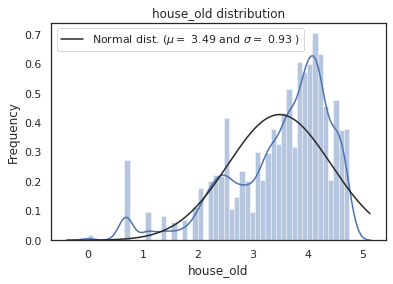

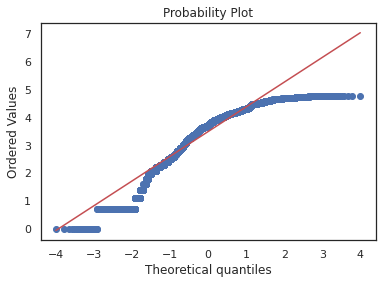

In [771]:
#use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["house_old"] = np.log1p(df["house_old"])

#Check the new distribution 
sns.distplot(df['house_old'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['house_old'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('house_old distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['house_old'], plot=plt)
plt.show()

In [772]:
df.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_old
0,13.602442,4,3.25,8.013343,9.507329,1.0,0,0,5,9,8.013343,0.000000,7.659643,8.929833,1,9.709781,4.094345
1,12.533580,4,2.50,7.844241,8.922792,1.0,0,0,3,8,7.467942,6.685861,7.723562,9.082621,0,9.215427,3.688879
2,12.909173,3,2.50,7.771067,8.372167,2.0,0,0,3,8,7.771067,0.000000,7.771067,8.377701,0,8.809116,2.302585
3,12.611541,2,1.00,6.710523,8.254529,1.0,0,0,4,6,6.710523,0.000000,7.327123,8.254529,0,8.447843,4.605170
4,13.457407,2,1.50,7.244942,8.306719,1.0,0,0,4,8,7.244942,0.000000,7.550135,8.689633,0,8.603554,4.127134


In [773]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
price               21613 non-null float64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null float64
lot_measure         21613 non-null float64
ceil                21613 non-null category
coast               21613 non-null category
sight               21613 non-null category
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null float64
basement            21613 non-null float64
living_measure15    21613 non-null float64
lot_measure15       21613 non-null float64
furnished           21613 non-null category
total_area          21613 non-null float64
house_old           21613 non-null float64
dtypes: category(6), float64(10), int64(1)
memory usage: 1.9 MB


### 4. Train_Test split

In [0]:
Y = df['price']
X = df.drop(['price'], axis =1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=100)

In [775]:
X_train.shape

(15129, 16)

In [776]:
Y_train.shape

(15129,)

In [777]:
X_test.shape

(6484, 16)

In [778]:
Y_test.shape

(6484,)

### 5. Model Building